# Subrata Paul final code

# Gender Prediction for E-Commerce
With the evolution of the information and communication technologies and the rapid growth of the Internet for the exchange and distribution of information, Electronic Commerce (e-commerce) has gained massive momentum globally, and attracted more and more worldwide users overcoming the time constraints and distance barriers.

It is important to gain in-depth insights into e-commerce via data-driven analytics and identify the factors affecting product sales, the impact of characteristics of customers on their purchase habits.

It is quite useful to understand the demand, habits, concern, perception, and interest of customers from the clue of genders for e-commerce companies. 

However, the genders of users are in general unavailable in e-commerce platforms. To address this gap the aim here is to predict the gender of e-commerce’s participants from their product viewing records.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline

In [2]:
data_org=pd.read_csv('D:\\DS\\Janata Hack_AnalyticsVidhya\\train.csv')

In [3]:
data_org.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [4]:
data_org.isnull().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
gender         0
dtype: int64

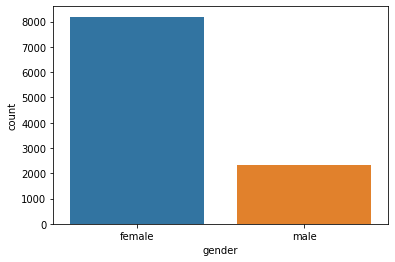

In [5]:
#Checking the ratio of genders in the dataset
sns.countplot(data_org['gender'])

In [6]:
data_org['gender'].value_counts()

female    8192
male      2308
Name: gender, dtype: int64

In [7]:
# Analysis of the Session Durations

In [8]:
#using to_datetime function of pandas to convert the data related columns 
data_org['startTime']=pd.to_datetime(data_org['startTime'],format='%d/%m/%y %H:%M')
data_org['endTime']=pd.to_datetime(data_org['endTime'],format='%d/%m/%y %H:%M')

In [9]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 5 columns):
session_id     10500 non-null object
startTime      10500 non-null datetime64[ns]
endTime        10500 non-null datetime64[ns]
ProductList    10500 non-null object
gender         10500 non-null object
dtypes: datetime64[ns](2), object(3)
memory usage: 410.2+ KB


In [10]:
#Calculating the duration or amount of time spect in the session in mins

data_org['Duration_in_min']=((data_org['endTime']-data_org['startTime']).dt.total_seconds())/60

In [11]:
data_org.head(10)

,session_id,startTime,endTime,ProductList,gender,Duration_in_min
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,1.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,6.0
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,female,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2.0
5,u20964,2014-12-12 15:31:00,2014-12-12 15:31:00,A00002/B00002/C00081/D25039/,female,0.0
6,u20981,2014-12-05 19:33:00,2014-12-05 19:34:00,A00002/B00011/C00180/D18487/;A00002/B00011/C00...,female,1.0
7,u15947,2014-12-09 16:02:00,2014-12-09 16:06:00,A00002/B00001/C00059/D15254/;A00002/B00001/C00...,male,4.0
8,u18193,2014-11-25 11:55:00,2014-11-25 11:55:00,A00002/B00001/C00010/D06129/,male,0.0
9,u21820,2014-12-06 16:16:00,2014-12-06 16:17:00,A00002/B00001/C00010/D12841/;A00002/B00002/C00...,female,1.0


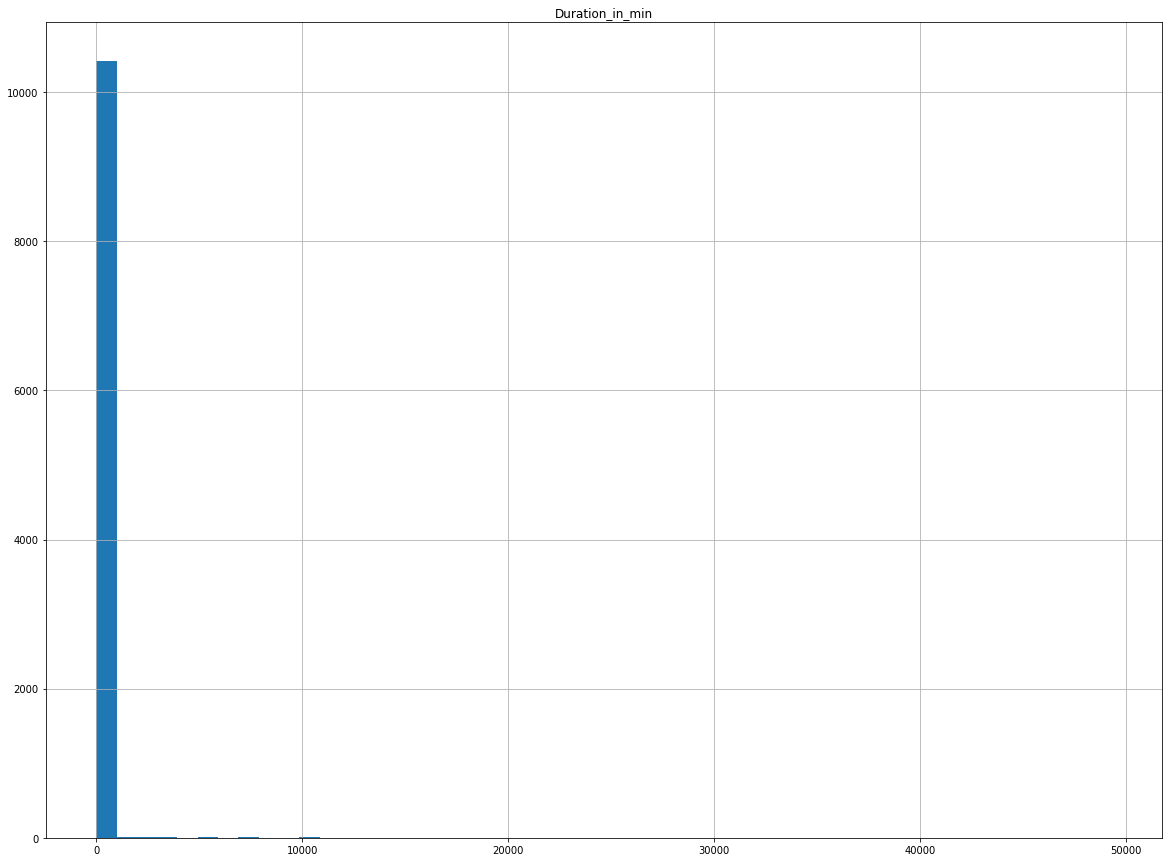

In [12]:
#Checking session duration analysis
data_org.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
#Lets check for female how  duration is distributed
data_org[data_org['gender']=='female'].describe()

,Duration_in_min
count,8192.000000
mean,118.476440
std,1836.863469
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,49269.000000


In [14]:
#Above shows some max as weird value 49269 mins which means almost 34 days!!!! are you kidding me !!!!

data_max_time=data_org[data_org['Duration_in_min']==49269.000000].copy()
data_max_time

,session_id,startTime,endTime,ProductList,gender,Duration_in_min
9978,u15861,2014-11-18 11:10:00,2014-12-22 16:19:00,A00002/B00002/C00007/D06697/;A00002/B00002/C00...,female,49269.0


In [15]:
##Yes the start and the end time shows session was open for more than a month !!..can be a outlier have to check the distribution

In [16]:
#Checking what all products veiwed in such a long session !!
product_max=data_max_time['ProductList'].tolist()
type(product_max)
print(product_max)

['A00002/B00002/C00007/D06697/;A00002/B00002/C00007/D04099/;A00002/B00002/C00007/D11911/']


In [17]:
#Lets check for male how  duration is distributed
data_org[data_org['gender']=='male'].describe()

,Duration_in_min
count,2308.000000
mean,141.183709
std,1653.294167
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,36982.000000


In [18]:
#Checking what all products veiwed in such a long session by a guy !!
male_max_time=data_org[data_org['Duration_in_min']==36982.000000].copy()
male_max_time

,session_id,startTime,endTime,ProductList,gender,Duration_in_min
3088,u17312,2014-11-22 15:31:00,2014-12-18 07:53:00,A00004/B00049/C00083/D09791/;A00002/B00002/C00...,male,36982.0


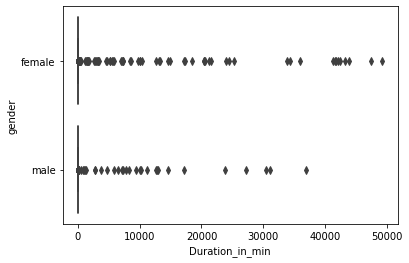

In [19]:
#Checking the median values as average/mean is highly impacted by the outliers which is a loads in this datasets
sns.boxplot(y=data_org['gender'],x=data_org['Duration_in_min'])
plt.show()

In [20]:
#Session more that 1 hour in a e commerce portal looks very unlikely
#Checking how many values are above 60 mins
data_org[data_org['Duration_in_min']>60].shape

(130, 6)

In [21]:
#Checking gender ratio for session dureation beyond 1 hr
data_org.loc[data_org['Duration_in_min']>60,'gender'].value_counts()

female    95
male      35
Name: gender, dtype: int64

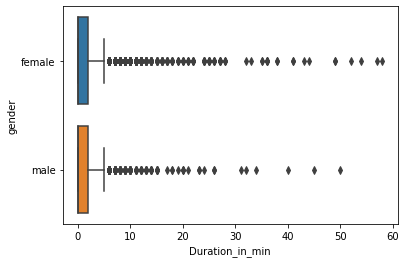

In [22]:
#lets see the distribution for the data of duration till 1 hr
data_60=data_org[data_org['Duration_in_min']<=60].copy()
sns.boxplot(y=data_60['gender'],x=data_60['Duration_in_min'])
plt.show()

In [23]:
data_60.describe()

,Duration_in_min
count,10370.000000
mean,1.653520
std,3.566544
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,58.000000


C:\Users\subra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


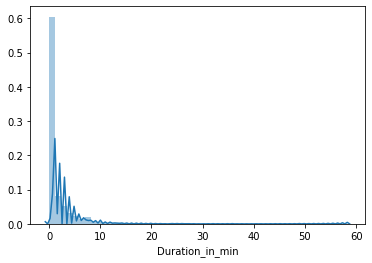

In [24]:
sns.distplot(data_60['Duration_in_min'])

In [25]:
#Lets convert of the data where duration above 60 mins as 60  as 60 is a long enough time for a session to be open
data_ciel=data_org.copy()
data_ciel['Duration_in_min'].where(data_ciel['Duration_in_min']<60,60,inplace=True)

In [26]:
data_ciel.describe()

,Duration_in_min
count,10500.000000
mean,2.375905
std,7.361622
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,60.000000


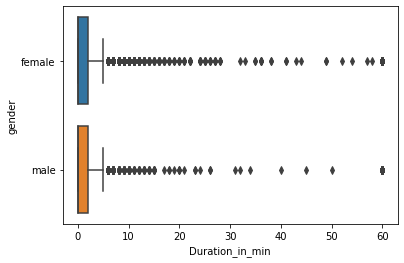

In [27]:
sns.boxplot(y=data_ciel['gender'],x=data_ciel['Duration_in_min'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002010F8B2978>]],
      dtype=object)

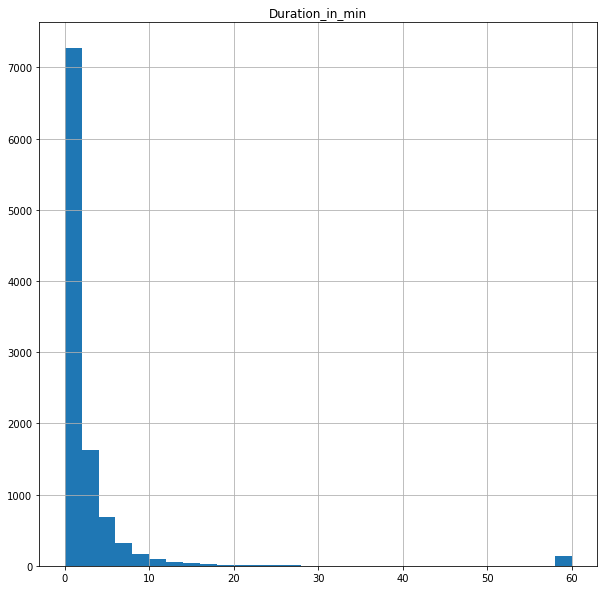

In [28]:
data_ciel.hist(bins=30,figsize=(10,10))

# Analysis of the ProductList

In [29]:
    #Checking the sample data
    data_ciel.head()

,session_id,startTime,endTime,ProductList,gender,Duration_in_min
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,1.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,6.0
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,female,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2.0


In [30]:
#female sample
data_ciel['ProductList'][0]

'A00002/B00003/C00006/D28435/;A00002/B00003/C00006/D02554/;A00002/B00003/C00006/D28436/;A00002/B00003/C00006/D28437/'

In [31]:
#male Sample
data_ciel['ProductList'][1][0:6]

'A00001'

In [32]:
cat_1=[]

for i in data_ciel['ProductList']:
    cat_1.append(i[0:6])

In [33]:
cat_1[1]

'A00001'

In [34]:
df_cat1=pd.DataFrame(list(cat_1),columns=['Cat_1'])

In [35]:
df_cat1.head()

,Cat_1
0,A00002
1,A00001
2,A00002
3,A00002
4,A00001


In [36]:
df_cat1=pd.concat([data_ciel,df_cat1],axis=1)

In [37]:
df_cat1.head()

,session_id,startTime,endTime,ProductList,gender,Duration_in_min,Cat_1
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,1.0,A00002
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,6.0,A00001
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,female,0.0,A00002
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3.0,A00002
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2.0,A00001


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

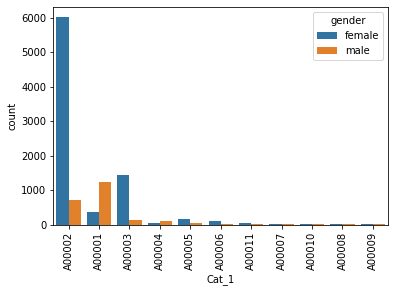

In [38]:
sns.countplot(df_cat1['Cat_1'],hue=df_cat1['gender'])
plt.xticks(rotation=90)

In [39]:
#Trying same way with the sub category
cat_2=[]

for i in data_ciel['ProductList']:
    cat_2.append(i[7:13])

In [40]:
df_cat2=pd.DataFrame(list(cat_2),columns=['Cat_2'])

In [41]:
df_cat2.head()

,Cat_2
0,B00003
1,B00009
2,B00001
3,B00004
4,B00001


In [42]:
df_cat1_2=pd.concat([df_cat1,df_cat2],axis=1)

In [43]:
df_cat1_2.head()

,session_id,startTime,endTime,ProductList,gender,Duration_in_min,Cat_1,Cat_2
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,1.0,A00002,B00003
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,6.0,A00001,B00009
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,female,0.0,A00002,B00001
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3.0,A00002,B00004
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2.0,A00001,B00001


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 <a list of 82 Text xticklabel objects>)

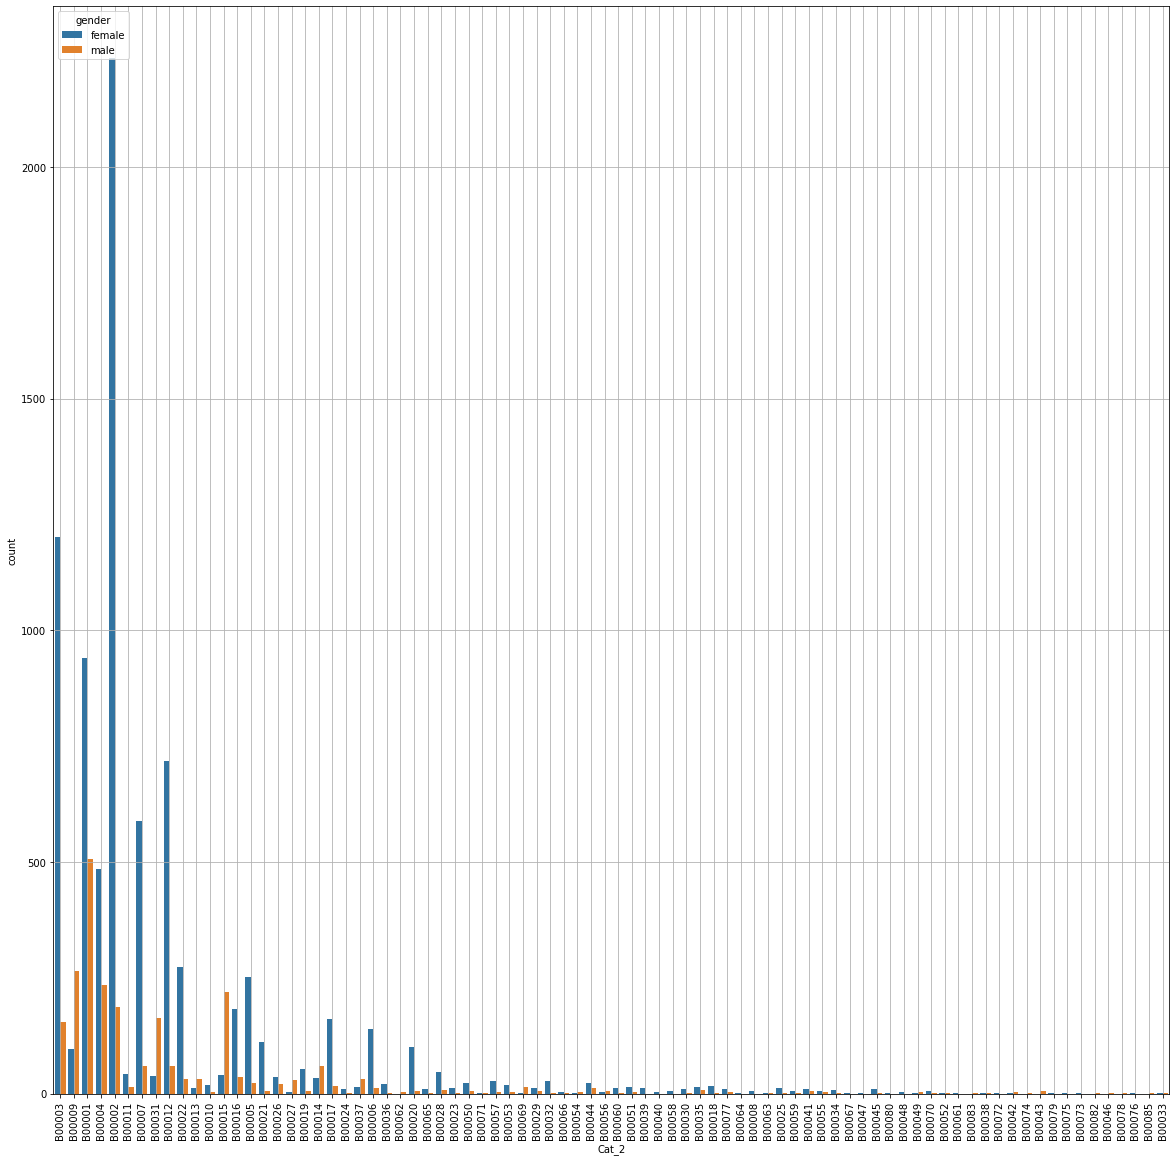

In [44]:
plt.figure(figsize=(20,20))
sns.countplot(df_cat1_2['Cat_2'],hue=df_cat1_2['gender'])
plt.grid()
plt.xticks(rotation=90)


In [45]:
#Splitting dataset into the features & predicted/dependent variable
X=df_cat1[['Duration_in_min','Cat_1']]
y=df_cat1['gender']

In [46]:
X.head()

,Duration_in_min,Cat_1
0,1.0,A00002
1,6.0,A00001
2,0.0,A00002
3,3.0,A00002
4,2.0,A00001


In [47]:
y.head()

0    female
1      male
2    female
3    female
4      male
Name: gender, dtype: object

In [48]:
#Handling the categorical variables
X=pd.get_dummies(X)

In [49]:
X.head()

,Duration_in_min,Cat_1_A00001,Cat_1_A00002,Cat_1_A00003,Cat_1_A00004,Cat_1_A00005,Cat_1_A00006,Cat_1_A00007,Cat_1_A00008,Cat_1_A00009,Cat_1_A00010,Cat_1_A00011
0,1.0,0,1,0,0,0,0,0,0,0,0,0
1,6.0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0,1,0,0,0,0,0,0,0,0,0
3,3.0,0,1,0,0,0,0,0,0,0,0,0
4,2.0,1,0,0,0,0,0,0,0,0,0,0


In [50]:
#Splitting the training and the test dataset, keeping(startifying) the dataset ratio as per the gender
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=df_cat1['gender'])

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
#Using Random forest classifier as its good with handling overfitting
clf_1=RandomForestClassifier(n_estimators=500,random_state=42)

In [53]:
clf_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [54]:
y_pred=clf_1.predict(X_test)

In [55]:
print(accuracy_score(y_test,y_pred))

0.878095238095238


In [56]:
pd.crosstab(index=y_test,columns=y_pred,rownames=['Actual Gender'],colnames=['Predicted Gender'])

Predicted Gender,female,male
Actual Gender,,
female,2355,103
male,281,411


# Testing the classifier with test data

In [57]:
def gender_prediction():
    file_path=input('Enter test File path:')
    test_data=pd.read_csv(file_path)
    #using to_datetime function of pandas to convert the data related columns 
    test_data['startTime']=pd.to_datetime(test_data['startTime'],format='%d/%m/%y %H:%M')
    test_data['endTime']=pd.to_datetime(test_data['endTime'],format='%d/%m/%y %H:%M')
    #Calculating the duration or amount of time spect in the session in mins

    test_data['Duration_in_min']=((test_data['endTime']-test_data['startTime']).dt.total_seconds())/60
    test_ciel=test_data.copy()
    test_ciel['Duration_in_min'].where(test_ciel['Duration_in_min']<60,60,inplace=True)
    
    cat_1=[]
    for i in test_ciel['ProductList']:
        cat_1.append(i[0:6])
    d_cat1=pd.DataFrame(list(cat_1),columns=['Cat_1'])
    d_cat1=pd.concat([test_ciel,d_cat1],axis=1)
    X=d_cat1[['Duration_in_min','Cat_1']]
    ##y=d_cat1['gender']
    X=pd.get_dummies(X)
    y_pred=clf_1.predict(X)
    y_pred=pd.Series(y_pred)
    
    final_df=pd.concat([test_data[['session_id']],y_pred],axis=1)
    final_df.to_csv('Test_result.csv')

"def gender_prediction():\n    file_path=input('Enter test File path:')\n    test_data=pd.read_csv(file_path)\n    #using to_datetime function of pandas to convert the data related columns \n    test_data['startTime']=pd.to_datetime(test_data['startTime'],format='%d/%m/%y %H:%M')\n    test_data['endTime']=pd.to_datetime(test_data['endTime'],format='%d/%m/%y %H:%M')\n    #Calculating the duration or amount of time spect in the session in mins\n\n    test_data['Duration_in_min']=((test_data['endTime']-test_data['startTime']).dt.total_seconds())/60\n    test_ciel=test_data.copy()\n    test_ciel['Duration_in_min'].where(test_ciel['Duration_in_min']<60,60,inplace=True)\n    \n    cat_1=[]\n    for i in test_ciel['ProductList']:\n        cat_1.append(i[0:6])\n    d_cat1=pd.DataFrame(list(cat_1),columns=['Cat_1'])\n    d_cat1=pd.concat([test_ciel,d_cat1],axis=1)\n    X=d_cat1[['Duration_in_min','Cat_1']]\n    ##y=d_cat1['gender']\n    X=pd.get_dummies(X)\n    y_pred=clf_1.predict(X)\n    y_pr

In [58]:
gender_prediction()